## DA5401 A5: Imputation via Regression for Missing Data
**Student:** Pratyay Piyush Mishra  
**Roll:** DA25E053

In [58]:
import pandas as pd
import numpy as np

### Reading dataset and relacing 10% of values in Age and Bill_Amt1 with null values

In [59]:
df = pd.read_csv('UCI_Credit_Card.csv')

# Introduce missing values (NaN) into the 'AGE' column to simulate real-world data issues
np.random.seed(42)
indices_missing_age = np.random.choice(df.shape[0], size=int(df.shape[0]*.1), replace=False)
df.loc[indices_missing_age, 'AGE'] = np.nan

# Introduce missing values (NaN) into the 'BILL_AMT1' column to simulate real-world data issues
np.random.seed(28)
indices_missing_bill = np.random.choice(df.shape[0], size=int(df.shape[0]*.1), replace=False)
df.loc[indices_missing_bill, 'BILL_AMT1'] = np.nan

### Median imputed dataset(Dataset A) created

We use median over the mean for imputation because it is more robust to outliers and skewed data distributions. While mean imputation is simpler to calculate, it can significantly distort the dataset's statistical properties, especially when the data is not perfectly symmetrical.

In [73]:
# Create a copy of the original dataframe for median imputation (df_a)
df_a = df.copy()

# Impute missing values in each column of df_a with the median of that column
for col in df_a.columns:
    if df_a[col].isnull().any():
        median_val = df_a[col].median()
        df_a[col].fillna(median_val, inplace=True)

/tmp/ipython-input-3757802890.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_a[col].fillna(median_val, inplace=True)


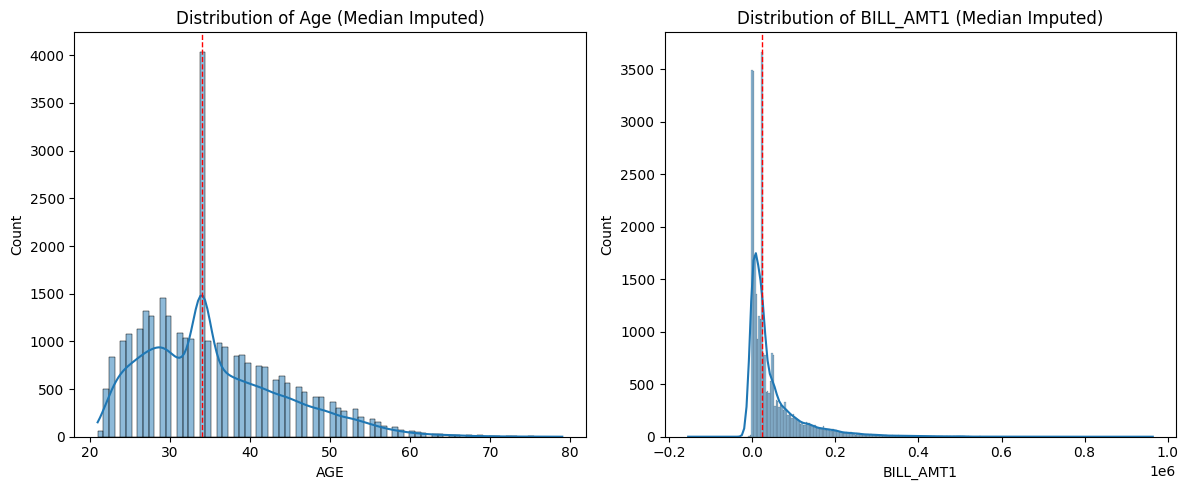

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Created a figure and subplots to display multiple plots
plt.figure(figsize=(12, 5))

# Created the first subplot for the distribution of 'AGE'
plt.subplot(1, 2, 1)
sns.histplot(df_a['AGE'], kde=True)
plt.axvline(df_a['AGE'].median(), color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Age (Median Imputed)')

# Created the second subplot for the distribution of 'BILL_AMT1'
plt.subplot(1, 2, 2)
sns.histplot(df_a['BILL_AMT1'], kde=True)
plt.axvline(df_a['BILL_AMT1'].median(), color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of BILL_AMT1 (Median Imputed)')

plt.tight_layout()
plt.show()

### Regression imputed dataset created(Dataset B)

The Missing at Random (MAR) assumption states that the probability of a data point being missing depends on the observed data, but not on the value of the missing data itself. If this assumption holds, the missing data mechanism is considered "ignorable," meaning that advanced statistical methods can produce valid inferences without explicitly modeling why the data is missing.

In [62]:
from sklearn.linear_model import LinearRegression

# Create a copy of the original dataframe for Linear Regression imputation (df_b)
df_b = df.copy()

# Drop rows with missing 'BILL_AMT1' as a preprocessing step before imputing 'AGE'
df_b.dropna(subset=['BILL_AMT1'], inplace=True)

# Separate the dataframe into two parts: rows where 'AGE' is known and rows where 'AGE' is missing
df_age_known = df_b.dropna(subset=['AGE'])
df_age_missing = df_b[df_b['AGE'].isnull()]

# Define features (X) and target (y) for the Linear Regression model to predict 'AGE'
# Dynamically select numerical columns as features, excluding 'ID', 'AGE', and 'default.payment.next.month'
features = df_age_known.select_dtypes(include=np.number).columns.tolist()
features.remove('ID')
features.remove('AGE') # Remove the target variable 'AGE' from the features
features.remove('default.payment.next.month') # Exclude the final target variable

# Prepare training data (X_train, y_train) and testing data (X_test) for the Linear Regression model
X_train = df_age_known[features]
y_train = df_age_known['AGE']
X_test = df_age_missing[features]

# Train a Linear Regression model on the data where 'AGE' is known
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing 'AGE' values using the trained Linear Regression model
predicted_age = model.predict(X_test)

# Fill the missing 'AGE' values in the df_b dataframe with the predicted values
df_b.loc[df_b['AGE'].isnull(), 'AGE'] = predicted_age

In [63]:
display(df_b.isnull().sum().sum())

np.int64(0)

### D-Tree imputed dataset created(Dataset C)

In [64]:
# Import DecisionTreeRegressor model for imputation
from sklearn.tree import DecisionTreeRegressor

# Create a copy of the original dataframe for Decision Tree imputation (df_c)
df_c = df.copy()

# Drop rows with missing 'BILL_AMT1' as a preprocessing step before imputing 'AGE'
df_c.dropna(subset=['BILL_AMT1'], inplace=True)

# Separate the dataframe into two parts: rows where 'AGE' is known and rows where 'AGE' is missing for Decision Tree
df_age_known_dtree = df_c.dropna(subset=['AGE'])
df_age_missing_dtree = df_c[df_c['AGE'].isnull()]

# Define features (X) and target (y) for the Decision Tree Regressor model to predict 'AGE'
# Dynamically select numerical columns as features, excluding 'ID', 'AGE', and 'default.payment.next.month'
features = df_age_known_dtree.select_dtypes(include=np.number).columns.tolist()
features.remove('ID')
features.remove('AGE') # Remove the target variable 'AGE' from the features
features.remove('default.payment.next.month') # Exclude the final target variable

# Prepare training data (X_train_dtree, y_train_dtree) and testing data (X_test_dtree) for the Decision Tree Regressor model
X_train_dtree = df_age_known_dtree[features]
y_train_dtree = df_age_known_dtree['AGE']
X_test_dtree = df_age_missing_dtree[features]

# Train a Decision Tree Regressor model on the data where 'AGE' is known
dtree_model = DecisionTreeRegressor(random_state=42) # Set random_state for reproducibility
dtree_model.fit(X_train_dtree, y_train_dtree)

# Predict the missing 'AGE' values using the trained Decision Tree Regressor model
predicted_age_dtree = dtree_model.predict(X_test_dtree)

# Fill the missing 'AGE' values in the df_c dataframe with the predicted values
df_c.loc[df_c['AGE'].isnull(), 'AGE'] = predicted_age_dtree

In [65]:
display(df_c.isnull().sum().sum())

np.int64(0)

### Dataset for Model D(dropping rows with missing values)

In [66]:
# Create a new dataframe df_d by dropping all rows with any missing values from the original dataframe
df_d = df.copy()
df_d.dropna(inplace=True)
# Display the total number of remaining missing values in df_d (should be 0)
display(df_d.isnull().sum().sum())

np.int64(0)

### Split all datasets into train test pairs

In [67]:
# Import train_test_split for splitting data
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) for the classification task
# Exclude 'ID' and the target variable 'default.payment.next.month' from features
features = [col for col in df_a.columns if col not in ['ID', 'default.payment.next.month']]
target = 'default.payment.next.month'

# Split df_a into training and testing sets
X_a, y_a = df_a[features], df_a[target]
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2, random_state=42) # Use a test size of 20% and set random_state for reproducibility

# Split df_b into training and testing sets
X_b, y_b = df_b[features], df_b[target]
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42) # Use a test size of 20% and set random_state for reproducibility

# Split df_c into training and testing sets
X_c, y_c = df_c[features], df_c[target]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42) # Use a test size of 20% and set random_state for reproducibility

# Split df_d into training and testing sets
X_d, y_d = df_d[features], df_d[target]
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42) # Use a test size of 20% and set random_state for reproducibility

### Standardizing all features in dataset

In [68]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features of the training and testing sets for df_a
X_train_a = scaler.fit_transform(X_train_a)
X_test_a = scaler.transform(X_test_a)

# Standardize the features of the training and testing sets for df_b
X_train_b = scaler.fit_transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

# Standardize the features of the training and testing sets for df_c
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)

# Standardize the features of the training and testing sets for df_d
X_train_d = scaler.fit_transform(X_train_d)
X_test_d = scaler.transform(X_test_d)

### Fit logistic regression models to each dataset and evaluate performance

In [72]:
# Import LogisticRegression model for classification
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model on the standardized data from df_a
# Using class_weight='balanced' to handle potential class imbalance
model_a = LogisticRegression(random_state=42,class_weight='balanced')
model_a.fit(X_train_a, y_train_a)

# Train a Logistic Regression model on the standardized data from df_b
model_b = LogisticRegression(random_state=42,class_weight='balanced')
model_b.fit(X_train_b, y_train_b)

# Train a Logistic Regression model on the standardized data from df_c
model_c = LogisticRegression(random_state=42,class_weight='balanced')
model_c.fit(X_train_c, y_train_c)

# Train a Logistic Regression model on the standardized data from df_d
model_d = LogisticRegression(random_state=42,class_weight='balanced')
model_d.fit(X_train_d, y_train_d)

LogisticRegression(class_weight='balanced', random_state=42)

In [70]:
# Import classification_report for model evaluation
from sklearn.metrics import classification_report

# Evaluate the performance of model_a and print the classification report
y_pred_a = model_a.predict(X_test_a)
print("Classification Report for df_a (Median Imputation):")
print(classification_report(y_test_a, y_pred_a))

# Evaluate the performance of model_b and print the classification report
y_pred_b = model_b.predict(X_test_b)
print("Classification Report for df_b (Linear Regression Imputation):")
print(classification_report(y_test_b, y_pred_b))

# Evaluate the performance of model_c and print the classification report
y_pred_c = model_c.predict(X_test_c)
print("Classification Report for df_c (Decision Tree Imputation):")
print(classification_report(y_test_c, y_pred_c))

# Evaluate the performance of model_d and print the classification report
y_pred_d = model_d.predict(X_test_d)
print("Classification Report for df_d (Rows Dropped):")
print(classification_report(y_test_d, y_pred_d))

Classification Report for df_a (Median Imputation):
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      4687
           1       0.38      0.65      0.48      1313

    accuracy                           0.70      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.70      0.72      6000

Classification Report for df_b (Linear Regression Imputation):
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4245
           1       0.35      0.61      0.45      1155

    accuracy                           0.68      5400
   macro avg       0.61      0.65      0.61      5400
weighted avg       0.76      0.68      0.70      5400

Classification Report for df_c (Decision Tree Imputation):
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4245
           1       0.35      0.61      0.45      1155

    accu

### Model performance summary table

In [71]:
# Import necessary metrics and pandas for creating a summary table
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming y_test_a, y_pred_a, y_test_b, y_pred_b, y_test_c, y_pred_c, y_test_d, and y_pred_d are available from previous steps

# Create a list to store the performance metrics for each model
metrics_data = []

# Calculate metrics for df_a (Median Imputation) and append to the list
metrics_data.append({
    'Model': 'df_a (Median Imputation)',
    'Accuracy': accuracy_score(y_test_a, y_pred_a),
    'Precision (Class 1)': precision_score(y_test_a, y_pred_a, pos_label=1), # Precision for the positive class (default)
    'Recall (Class 1)': recall_score(y_test_a, y_pred_a, pos_label=1),     # Recall for the positive class (default)
    'F1-score (Class 1)': f1_score(y_test_a, y_pred_a, pos_label=1)         # F1-score for the positive class (default)
})

# Calculate metrics for df_b (Linear Regression Imputation) and append to the list
metrics_data.append({
    'Model': 'df_b (Linear Regression Imputation)',
    'Accuracy': accuracy_score(y_test_b, y_pred_b),
    'Precision (Class 1)': precision_score(y_test_b, y_pred_b, pos_label=1),
    'Recall (Class 1)': recall_score(y_test_b, y_pred_b, pos_label=1),
    'F1-score (Class 1)': f1_score(y_test_b, y_pred_b, pos_label=1)
})

# Calculate metrics for df_c (Decision Tree Imputation) and append to the list
metrics_data.append({
    'Model': 'df_c (Decision Tree Imputation)',
    'Accuracy': accuracy_score(y_test_c, y_pred_c),
    'Precision (Class 1)': precision_score(y_test_c, y_pred_c, pos_label=1),
    'Recall (Class 1)': recall_score(y_test_c, y_pred_c, pos_label=1),
    'F1-score (Class 1)': f1_score(y_test_c, y_pred_c, pos_label=1)
})

# Calculate metrics for df_d (Rows Dropped) and append to the list
metrics_data.append({
    'Model': 'df_d (Rows Dropped)',
    'Accuracy': accuracy_score(y_test_d, y_pred_d),
    'Precision (Class 1)': precision_score(y_test_d, y_pred_d, pos_label=1),
    'Recall (Class 1)': recall_score(y_test_d, y_pred_d, pos_label=1),
    'F1-score (Class 1)': f1_score(y_test_d, y_pred_d, pos_label=1)
})

# Create a pandas DataFrame from the collected metrics data
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame containing the performance metrics
display(metrics_df)

,Model,Accuracy,Precision (Class 1),Recall (Class 1),F1-score (Class 1)
0,df_a (Median Imputation),0.695833,0.384892,0.651942,0.484026
1,df_b (Linear Regression Imputation),0.678519,0.353209,0.605195,0.446075
2,df_c (Decision Tree Imputation),0.679444,0.354398,0.606926,0.447494
3,df_d (Rows Dropped),0.691358,0.378084,0.613023,0.467708


### Why might Model D perform poorly even if the imputed models perform worse?
Model D might produce a poor-performing model even if the imputation methods (A, B, C) seem to perform worse in evaluation metrics. This is because of the following:  


1.   When data are not MCAR, listwise deletion systematically removes cases that differ from the rest of the sample. For example, if people with higher incomes are less likely to report their earnings, listwise deletion will result in an underestimation of the average income. The resulting model is then trained on a biased subsample and will perform poorly on a test set that is representative of the true population.
2.   Reduced precision and higher variance: Removing a large portion of data points, especially with a high number of missing values, increases the variance of parameter estimates and reduces statistical power.
3.   Misleading metrics: Some metrics might suggest that an imputed model performs worse, but this might be an artifact of comparing it to a listwise deletion model that has learned spurious relationships from a biased subset of the data.



### Which regression method (Linear vs. Non-Linear) performed better and why? Relate this to the assumed relationship between the imputed feature and the predictors.  
Based on evaluation metrics, there is a very slight difference in performance between the two imputation methods, with the Decision Tree imputation leading to a marginally higher accuracy and F1-score for the minority class.

This implies that our assumtion that the missing feature column has a linear relationship with the remaining nonzero columns is incorrect. It might be such that the relationship is a non-linear one, or that there is no significant relationship between the imputed feature and the rest

### Conclude with a recommendation on the best strategy for handling missing datain this scenario, justifying your answer by referencing both the classification performance metrics and the conceptual implications of each method.

The best strategy to handle missing values here is the median imputation, which is shown by the significantly better f1-score achieved on that dataset. Generally speaking, we should go for linear or d-tree imputation methods only if our data and domain knowledge suggests dependence of features on each other, else a median imputation is the optimal strategy